<a href="https://colab.research.google.com/github/mann09/cds_mini_projects/blob/main/M1_MiniProject_2_Resume_Classification_Using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project on Resume Classification Using Naive Bayes

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Resume dataset
* perform multinomial Naive Bayes classification on the Resume dataset

### Dataset description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decisionmaking.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Downloading the data

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
profiles = pd.read_csv('UpdatedResumeDataSet.csv')
print(profiles)
print(profiles.shape)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]
(962, 2)


In [ ]:
# Tried removing duplicate records but the accuracy got affected largely

profiles = profiles.drop_duplicates()
print(profiles)
print(profiles.shape)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
894       Testing  Computer Skills: â¢ Proficient in MS office (...
895       Testing  â Willingness to accept the challenges. â ...
896       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
897       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
898       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[166 rows x 2 columns]
(166, 2)


### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [ ]:
# Display the distinct categories of resume
distinct_categories = profiles['Category'].unique()
for category in distinct_categories:
    print(category)

Data Science
HR
Advocate
Arts
Web Designing
Mechanical Engineer
Sales
Health and fitness
Civil Engineer
Java Developer
Business Analyst
SAP Developer
Automation Testing
Electrical Engineering
Operations Manager
Python Developer
DevOps Engineer
Network Security Engineer
PMO
Database
Hadoop
ETL Developer
DotNet Developer
Blockchain
Testing


In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category
category_counts = profiles['Category'].value_counts()
print(category_counts)

Java Developer               13
Database                     11
Data Science                 10
Advocate                     10
HR                           10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
Web Designing                 4
PMO                           3
Name: Category, dtype: int64


**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

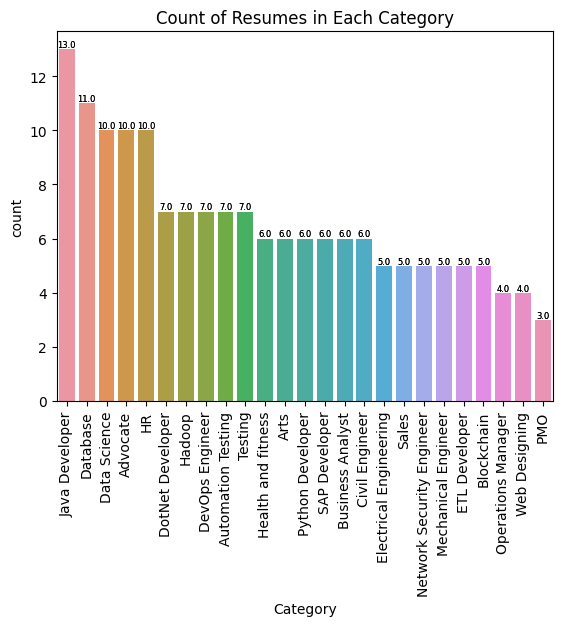

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of each category and sort them in descending order
category_counts = profiles['Category'].value_counts().sort_values(ascending=False)

# Set the color for all bars
bar_color = 'steelblue'

# Create the countplot with sorted categories and single color
sns.countplot(data=profiles, x='Category', order=category_counts.index, color=bar_color)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Resumes in Each Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count annotations to the bars
for p in sns.countplot(data=profiles, x='Category', order=category_counts.index).patches:
    height = p.get_height()
    plt.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=6)

plt.show()


**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

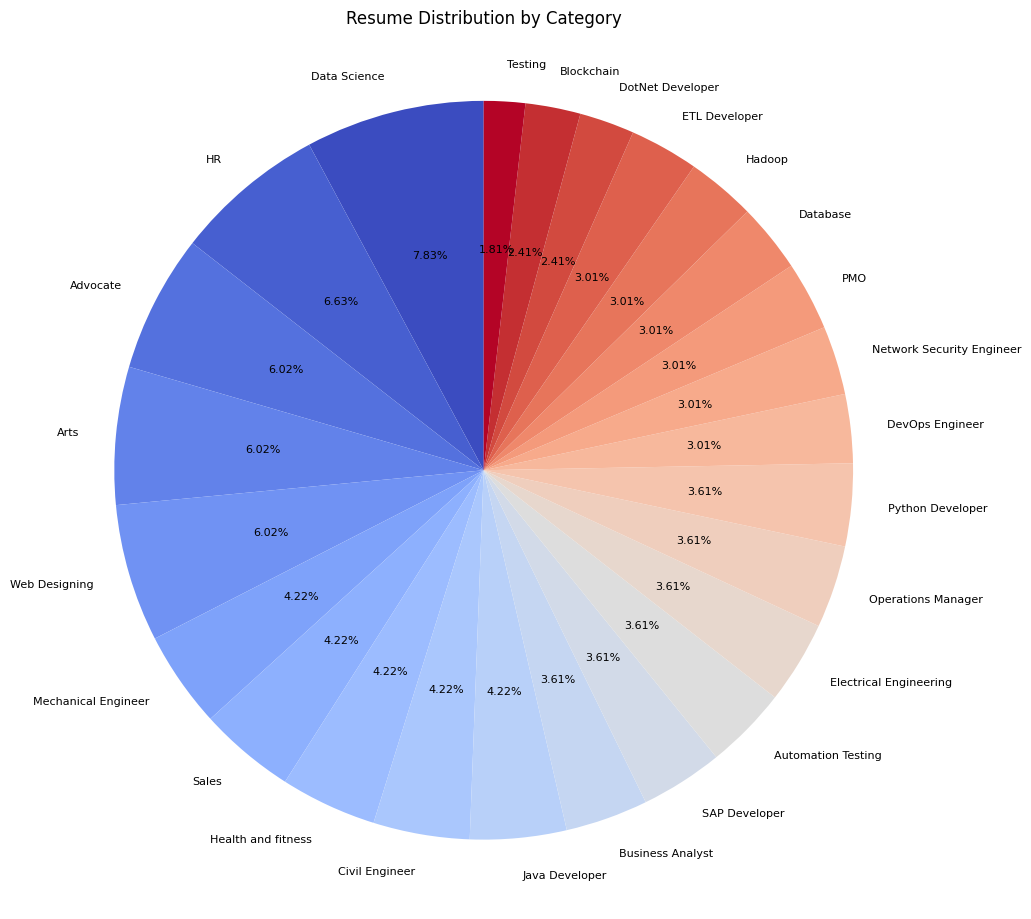

In [ ]:
targetCounts = profiles['Category'].value_counts()
targetLabels = profiles['Category'].unique()
# Make square figures and axes
plt.figure(figsize=(18, 18))

the_grid = GridSpec(2, 2)

# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)

# Calculate percentage
total_count = targetCounts.sum()
percentages = targetCounts / total_count * 100

# Create color map
# Create colormap with more than 30 colors
cmap = plt.get_cmap('coolwarm', len(targetCounts)) # for readability we are using diverging color scheme instead of labels
colors = cmap(range(len(targetCounts)))

# Create pie plot
plt.subplot(the_grid[0, 0], aspect=1) # check what the numbers mean???????????
plt.pie(percentages, labels=targetLabels, colors=colors, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.tight_layout()
plt.title('Resume Distribution by Category')
plt.axis('equal') # to avoid overlapping of labels?????????

# Show pie plot
plt.show()

**Exercise 5: Convert all the `Resume` text to lower case [0.5 Mark]**




In [ ]:
# Convert all characters to lowercase
profiles['Resume'] = profiles['Resume'].apply(lambda x: x.lower())
print(profiles)

         Category                                             Resume
0    Data Science  skills * programming languages: python (pandas...
1    Data Science  education details \r\nmay 2013 to may 2017 b.e...
2    Data Science  areas of interest deep learning, control syste...
3    Data Science  skills â¢ r â¢ python â¢ sap hana â¢ table...
4    Data Science  education details \r\n mca   ymcaust,  faridab...
..            ...                                                ...
894       Testing  computer skills: â¢ proficient in ms office (...
895       Testing  â willingness to accept the challenges. â ...
896       Testing  personal skills â¢ quick learner, â¢ eagerne...
897       Testing  computer skills & software knowledge ms-power ...
898       Testing  skill set os windows xp/7/8/8.1/10 database my...

[166 rows x 2 columns]


### Cleaning resumes' text data

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. Remove the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature).


In [ ]:
import re
def cleanResume(resumeText):
      # Clean URLs
    clean_text = re.sub(r'http\S+|www.\S+', '', resumeText)
    # Remove regex text
    clean_text = re.sub(r'\[.*?\]', '', clean_text)
    # Remove hashtags
    clean_text = re.sub(r'#\w+|\@\w+', '', clean_text)
     # Remove punctuations
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    # Remove extra whitespaces
    clean_text = re.sub(r'\s+', ' ', clean_text)
    # Remove non-ASCII characters
    clean_text = ''.join(char for char in clean_text if char in string.printable)

    return clean_text

In [ ]:
 # apply the function defined above and save the
profiles['cleaned_resume'] = profiles['Resume'].apply(lambda x: cleanResume(x))


In [ ]:
print(profiles.cleaned_resume)

0      skills programming languages python pandas num...
1      education details may 2013 to may 2017 be uitr...
2      areas of interest deep learning control system...
3      skills  r  python  sap hana  tableau  sap hana...
4      education details mca ymcaust faridabad haryan...
                             ...                        
894    computer skills  proficient in ms office word ...
895     willingness to accept the challenges  positiv...
896    personal skills  quick learner  eagerness to l...
897    computer skills software knowledge mspower poi...
898    skill set os windows xp788110 database mysql s...
Name: cleaned_resume, Length: 166, dtype: object


In [ ]:
sent_lens = [] # what is it doing????????????
for i in profiles.cleaned_resume:
    length = len(i.split())
    sent_lens.append(length)

print(len(sent_lens))
print(max(sent_lens))


166
2007


### Stopwords removal

The stopwords, for example, `and, the, was, and so forth` etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.

1. Tokenize the input words into individual tokens and store it in an array
2. Using `nltk.corpus.stopwords`, remove the stopwords

Hint: See Module 1 - Assignment 4 'Text Classification using Naive Bayes'


**Exercise 7: Use `nltk` package to find the most common words from the `cleaned resume` column [2 Marks]**

**Hint:**
* Use `nltk.FreqDist`


In [ ]:
# stop words
# YOUR CODE HERE to print the stop words in english language

# Get the English stopwords
english_stopwords = nltk.corpus.stopwords.words('english')
# Print the English stopwords
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# most common words
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize the cleaned resume text and remove stopwords
profiles['cleaned_resume_tokens'] = profiles['cleaned_resume'].apply(word_tokenize)
profiles['cleaned_resume_tokens'] = profiles['cleaned_resume_tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in english_stopwords])

# Concatenate all token lists into a single list
all_tokens = [token for sublist in profiles['cleaned_resume_tokens'] for token in sublist]

# Calculate the frequency distribution of words
fdist = FreqDist(all_tokens)

# Get the most common words and their frequencies
most_common_words = fdist.most_common(20)

# Display the most common words
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

exprience: 616
company: 595
description: 540
details: 531
months: 524
project: 523
data: 386
management: 315
1: 297
database: 276
team: 265
system: 234
maharashtra: 228
year: 227
testing: 215
using: 210
sql: 207
business: 202
less: 200
test: 200


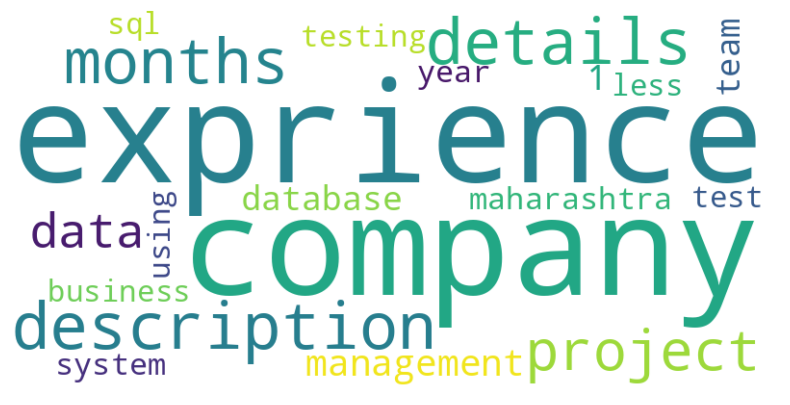

In [ ]:
# YOUR CODE HERE to show the most common word using WordCloud

# We are showing top 20 occuring words retrieved from FreqDist above
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(dict(most_common_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

#'bilinear': Bilinear interpolation.
#This method takes a weighted average of the four nearest pixels in the input image. It results in smoother scaling and is commonly used for most images, including word clouds.

plt.axis('off')
plt.show()

**Exercise 8: Convert the categorical variable `Category` to a numerical feature and make a different column, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a new column 'target' for the encoded target variable
profiles['target'] = LabelEncoder().fit_transform(profiles['Category'])

# Display the updated DataFrame
print(profiles)

         Category                                             Resume  \
0    Data Science  skills * programming languages: python (pandas...   
1    Data Science  education details \r\nmay 2013 to may 2017 b.e...   
2    Data Science  areas of interest deep learning, control syste...   
3    Data Science  skills â¢ r â¢ python â¢ sap hana â¢ table...   
4    Data Science  education details \r\n mca   ymcaust,  faridab...   
..            ...                                                ...   
894       Testing  computer skills: â¢ proficient in ms office (...   
895       Testing  â willingness to accept the challenges. â ...   
896       Testing  personal skills â¢ quick learner, â¢ eagerne...   
897       Testing  computer skills & software knowledge ms-power ...   
898       Testing  skill set os windows xp/7/8/8.1/10 database my...   

                                        cleaned_resume  \
0    skills programming languages python pandas num...   
1    education deta

### Feature Extraction

**Exercise 9: Convert the text to feature vectors by applying `tfidf vectorizer` to the Label encoded category made above [2 Marks]**

`TF-IDF`will tokenize documents, learn the vocabulary, inverse document frequency weightings, and allow you to encode new documents

**Hint:** Use [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).



In [ ]:
# Apply label encoding to the 'Category' column
label_encoder = LabelEncoder()
profiles['target'] = label_encoder.fit_transform(profiles['Category'])

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the 'target' column
target_vectors = tfidf_vectorizer.fit_transform(profiles['target'].astype(str))

# Convert the sparse matrix to a DataFrame
target_vectors_df = pd.DataFrame(target_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Increment the index values by 1
target_vectors_df.index = target_vectors_df.index + 1
# just for ease of reading , starting the index from 1 instead of 0

# Display the target vectors DataFrame
print(target_vectors_df)

# try to change the index starting from 1 instead of 0

      10   11   12   13   14   15   16   17   18   19   20   21   22   23   24
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
162  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
163  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
164  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
165  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
166  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[166 rows x 15 columns]


## Naive Bayes Classifier

**Exercise 10: Split the data into train and test sets. Apply Naive Bayes Classifier (MultinomialNB) and evaluate the model predictions [1 mark]**

**Hint:** Use Vectorized features made above as X and Labelled category as y.

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into train and test sets
X = profiles['cleaned_resume']
y = profiles['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the training and test sets
X_train_vectors = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors = tfidf_vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectors)

# Evaluate the model predictions
print(classification_report(y_test, y_pred))

# add conustion matrix //////////////////////////////////////////////////////////

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.03      1.00      0.06         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         2
          23       0.00    

                           precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         2
                     Arts       0.00      0.00      0.00         2
         Business Analyst       0.00      0.00      0.00         3
           Civil Engineer       0.00      0.00      0.00         2
             Data Science       1.00      1.00      1.00         1
                 Database       1.00      1.00      1.00         2
            ETL Developer       0.00      0.00      0.00         1
   Electrical Engineering       0.00      0.00      0.00         1
                       HR       0.00      0.00      0.00         5
                   Hadoop       0.00      0.00      0.00         3
       Health and fitness       0.00      0.00      0.00         2
           Java Developer       0.03      1.00      0.06         1
      Mechanical Engineer       0.00      0.00      0.00         1
Network Security Engineer       0.00      0.00      0.00     

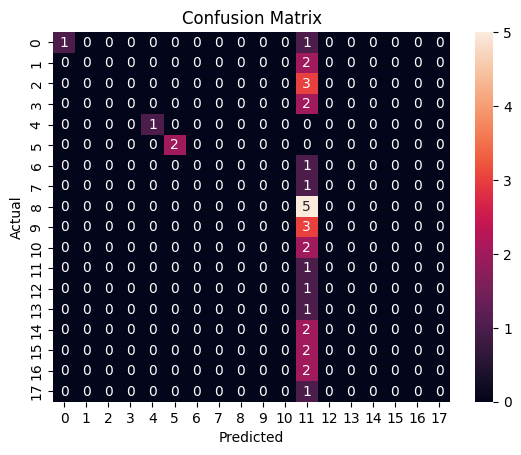

In [ ]:
# Generate the confusion matrix
#cm = confusion_matrix(y_test, y_pred)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(profiles['Category'])
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
# Evaluate the model predictions
print(classification_report(y_test_labels, y_pred_labels))

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#label_encoder.inverse_transform([0,1,2])


label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(profiles['Category'])
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)





## Optional: Create a Gradio based web interface to test and display the model predictions

**Report Analysis**
- Which method(s), other than TF-IDF could be used for text to vector conversion?
- Discuss about the `alpha`, `class_prior` and `fit_prior` parameters in sklearn `MultinomialNB`


In [ ]:
!pip install gradio

Dataset Source Reference: [Resume dataset](https://www.kaggle.com/gauravduttakiit/resume-dataset/download)

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming your dataset is stored in a variable called 'data'

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the entire dataset
X_vectors = tfidf_vectorizer.fit_transform(profiles['cleaned_resume'])

# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_vectors, profiles['target'])

# Function to make predictions
def predict_resume_category(text):
    # Clean and transform the input text
    cleaned_text = cleanResume(text)
    text_vector = tfidf_vectorizer.transform([cleaned_text])

    # Make prediction
    prediction = classifier.predict(text_vector)[0]

    # Map the predicted label back to category name
    category = label_encoder.inverse_transform([prediction])[0]

    return category

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_resume_category,
    inputs="text",
    outputs="text",
    title="Resume Category Prediction",
    description="Enter the resume text to predict the category.",
)

# Launch the interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>